In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
df.dropna(subset=['Review Text'], inplace=True)

In [5]:
df['Rating']

0        4
1        5
2        3
3        5
4        5
        ..
23481    5
23482    3
23483    3
23484    3
23485    5
Name: Rating, Length: 22641, dtype: int64

C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


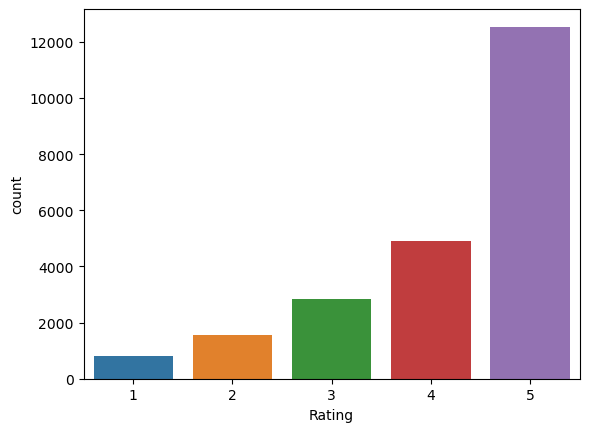

In [6]:
sns.countplot(data=df, x='Rating')
plt.show()

C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Review word count')

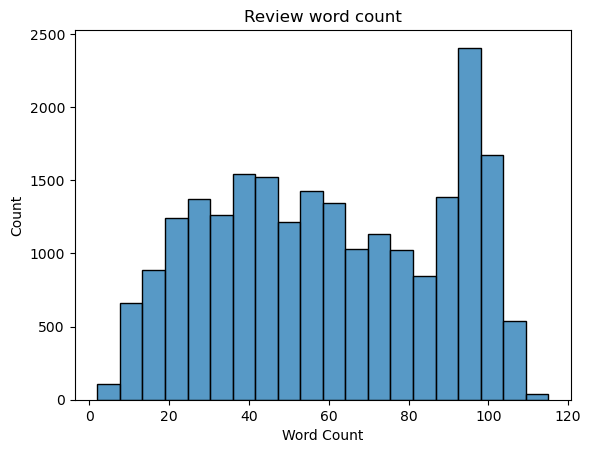

In [7]:
#word count
df['Word Count']=df['Review Text'].apply(lambda x: len(x.split()))
sns.histplot(df['Word Count'], bins=20)
plt.title('Review word count')

In [8]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [9]:
#sentiment Anaysis
#use textblob for sentiment analysis  to cateorise reviews into positive, neutral and negative sentiments based on the polarity score
from textblob import TextBlob
def polarity(text):
  sentiment = TextBlob(text).sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment == 0:
    return 'Neutral'
  else:
    return 'Negative'

C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

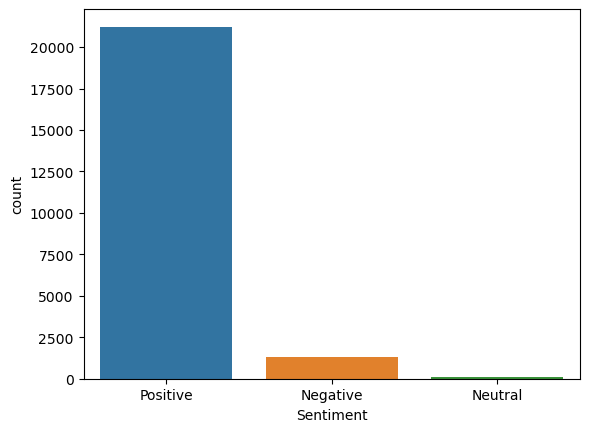

In [10]:
df['Sentiment']=df['Review Text'].apply(polarity)
sns.countplot(data=df, x='Sentiment')
plt.show

In [11]:
#stemming
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmetizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rokha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize text and remove stop words
def token(data):
    tokenized_data = []
    for text in data:
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        tokenized_data.append(filtered_tokens)
    return tokenized_data

# Apply tokenization and stop words removal to your data
df['Review Text'] = token(df['Review Text'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rokha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rokha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
lemmatizer = WordNetLemmatizer()



# Function to perform text preprocessing
def preprocess_text(text):
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text]
    
    return lemmatized_tokens

# Apply preprocessing to your data
df['Review Text'] = df['Review Text'].apply(preprocess_text)


In [15]:
df['Review Text']

0        [Absolutely, wonderful, -, silky, sexy, comfor...
1        [Love, dress, !, 's, sooo, pretty, ., happened...
2        [high, hope, dress, really, wanted, work, ., i...
3        [love, ,, love, ,, love, jumpsuit, ., 's, fun,...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [happy, snag, dress, great, price, !, 's, easy...
23482    [reminds, maternity, clothes, ., soft, ,, stre...
23483    [fit, well, ,, top, see, ., never, would, work...
23484    [bought, dress, wedding, summer, ,, 's, cute, ...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Review Text, Length: 22641, dtype: object

In [16]:
pip install gensim


     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.0 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 348.1 kB/s eta 0:00:00
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   ---------------------------------------- 60.3/60.3 kB 3.1 MB/s eta 0:00:00
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/42.2 MB 2.3

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
mediapipe 0.10.8 requires protobuf<4,>=3.11, but you have protobuf 4.25.1 which is incompatible.


In [17]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [25]:
import numpy as np

# Function to calculate document embeddings
def calculate_document_embedding(tokens):
    # Filter out tokens not in vocabulary
    tokens_in_vocab = [token for token in tokens if token in model.wv.key_to_index]
    if tokens_in_vocab:
        # Calculate the mean of word vectors
        word_vectors = model.wv[tokens_in_vocab]
        doc_embedding = np.mean(word_vectors, axis=0)
        return doc_embedding
    else:
        # Return None if no tokens in vocabulary
        return None

# Apply the function to each list of tokens in the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(calculate_document_embedding)


In [26]:
df['Review Text']

0        [-0.26848868, 0.08606052, 0.10392461, 1.093048...
1        [0.0030374175, 0.46964347, -0.3293041, -0.0997...
2        [-0.2371035, 0.56262326, -0.25506958, 0.125279...
3        [-0.35792202, 0.39699212, -0.050409317, 0.7116...
4        [-0.32439741, 0.49346727, -0.20040257, 0.28623...
                               ...                        
23481    [0.09948026, 0.27230477, -0.11380453, 0.669916...
23482    [-0.19424142, 0.15607633, -0.0033029676, 0.431...
23483    [-0.37613365, 0.24309193, -0.3362229, 0.032671...
23484    [-0.26061538, 0.43488094, -0.1898095, 0.224864...
23485    [-0.5554188, 0.7022684, -0.117083624, 0.619679...
Name: Review Text, Length: 22641, dtype: object

In [27]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Sentiment
0,0,767,33,NaN,"[-0.26848868, 0.08606052, 0.10392461, 1.093048...",4,1,0,Initmates,Intimate,Intimates,8,Positive
1,1,1080,34,NaN,"[0.0030374175, 0.46964347, -0.3293041, -0.0997...",5,1,4,General,Dresses,Dresses,62,Positive
2,2,1077,60,Some major design flaws,"[-0.2371035, 0.56262326, -0.25506958, 0.125279...",3,0,0,General,Dresses,Dresses,98,Positive
3,3,1049,50,My favorite buy!,"[-0.35792202, 0.39699212, -0.050409317, 0.7116...",5,1,0,General Petite,Bottoms,Pants,22,Positive
4,4,847,47,Flattering shirt,"[-0.32439741, 0.49346727, -0.20040257, 0.28623...",5,1,6,General,Tops,Blouses,36,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,"[0.09948026, 0.27230477, -0.11380453, 0.669916...",5,1,0,General Petite,Dresses,Dresses,28,Positive
23482,23482,862,48,Wish it was made of cotton,"[-0.19424142, 0.15607633, -0.0033029676, 0.431...",3,1,0,General Petite,Tops,Knits,38,Positive
23483,23483,1104,31,"Cute, but see through","[-0.37613365, 0.24309193, -0.3362229, 0.032671...",3,0,1,General Petite,Dresses,Dresses,42,Positive
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...","[-0.26061538, 0.43488094, -0.1898095, 0.224864...",3,1,2,General,Dresses,Dresses,86,Positive


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df['Review Text'].tolist()
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9419297858246853


In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df['Review Text'].tolist()
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression classifier
lr = LogisticRegression()

# Define hyperparameters for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

# Initialize grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_lr = grid_search.best_estimator_

# Predict on the testing set using the best model
y_pred = best_lr.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.9419297858246853


<Axes: xlabel='Rating', ylabel='count'>

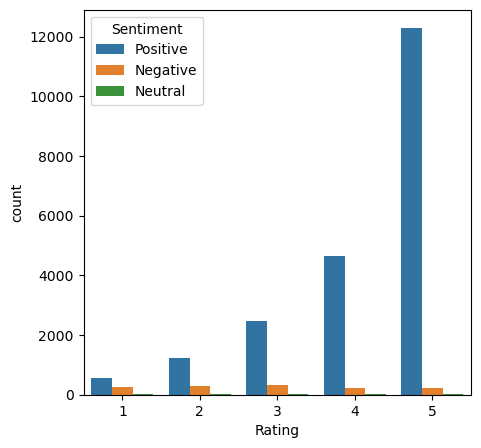

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x='Rating', hue='Sentiment', data=df)